In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import math
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import scipy
import copy

from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=0)

Below are the first five rows of the merged dataset.

In [3]:
df.head()

,URL,Page,Preferred,Mall,Product Name,Main Category,Sub Category 1,Sub Category 2,Current Rating,Total Rating,...,Lowest Price Guarantee,Whole Sale,Five Star,Four Star,Three Star,Two Star,One Star,With Comments,With Media,Description
Product ID,,,,,,,,,,,,,,,,,,,,,
0,https://shopee.ph/Kids-Everyday-Leggings-Sizes...,0,True,False,Kids Everyday Leggings Sizes for Infant-10 Yea...,Babies & Kids,Girls' Fashion,Bottom,4.9,4500,...,True,TRUE,4400,103,42,8,9,1300,853,NaN
1,https://shopee.ph/CUTE-PAJAMA-TERNO-SLEEPWEAR-...,0,False,False,CUTE PAJAMA TERNO SLEEPWEAR 1-2 yrs old wholes...,Babies & Kids,Babies' Fashion,Set,4.9,7500,...,True,TRUE,7200,188,73,23,20,3100,2000,NaN
2,https://shopee.ph/TERNO-PAJAMA-FOR-KIDS-1-T0-1...,0,False,False,TERNO PAJAMA FOR KIDS 1 T0 10Y.O,Babies & Kids,Girls' Fashion,Pajama,4.8,5800,...,True,TRUE,5100,349,193,59,105,1800,913,NaN
3,https://shopee.ph/KIDS-SHIRT-PAJAMA-TERNO-SET(...,0,True,False,KIDS SHIRT/ PAJAMA TERNO SET(GIRL & BOY)-(DIRE...,Babies & Kids,Boys' Fashion,Set,4.9,3100,...,False,FALSE,3000,93,37,7,8,1200,734,NaN
4,https://shopee.ph/Baby-Tender-Baby-Wipes-80's-...,0,False,True,Baby Tender Baby Wipes 80's Pack of 1,Babies & Kids,Diapers & Wipes,Wipes,4.7,16300,...,False,FALSE,10700,747,491,199,264,4100,3200,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41493 entries, 0 to 41962
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URL                     41493 non-null  object 
 1   Page                    41493 non-null  int64  
 2   Preferred               41493 non-null  bool   
 3   Mall                    41493 non-null  bool   
 4   Product Name            41493 non-null  object 
 5   Main Category           41493 non-null  object 
 6   Sub Category 1          40908 non-null  object 
 7   Sub Category 2          35897 non-null  object 
 8   Current Rating          41493 non-null  float64
 9   Total Rating            41493 non-null  int64  
 10  Total Sold              41493 non-null  int64  
 11  Favorite                41380 non-null  float64
 12  Discount Range          38539 non-null  float64
 13  Price Range             39808 non-null  float64
 14  Discount Percentage     38539 non-null

In [5]:
df.columns

Index(['URL', 'Page', 'Preferred', 'Mall', 'Product Name', 'Main Category',
       'Sub Category 1', 'Sub Category 2', 'Current Rating', 'Total Rating',
       'Total Sold', 'Favorite', 'Discount Range', 'Price Range',
       'Discount Percentage', 'Free Shipping', 'Free Shipping Info',
       'Shipping Location', 'Shipping Price Range', 'Brand Name', 'Store Name',
       'Store Ratings', 'Store Products Count', 'Store Response Rate',
       'Store Response Time', 'Store Joined', 'Store Followers',
       'Shipping From', 'Vouchers Available', 'Bundle Details',
       'Coins Available', 'Product Variation List', 'Lowest Price Guarantee',
       'Whole Sale', 'Five Star', 'Four Star', 'Three Star', 'Two Star',
       'One Star', 'With Comments', 'With Media', 'Description'],
      dtype='object')

Now we look at the null values in the merged dataset. We can see that many features seem to have null values.

In [6]:
df.isnull().sum()

URL                           0
Page                          0
Preferred                     0
Mall                          0
Product Name                  0
Main Category                 0
Sub Category 1              585
Sub Category 2             5596
Current Rating                0
Total Rating                  0
Total Sold                    0
Favorite                    113
Discount Range             2954
Price Range                1685
Discount Percentage        2954
Free Shipping                 0
Free Shipping Info        22205
Shipping Location           143
Shipping Price Range         40
Brand Name                 4201
Store Name                 3458
Store Ratings               111
Store Products Count        111
Store Response Rate           0
Store Response Time        3458
Store Joined                  0
Store Followers            3458
Shipping From              3468
Vouchers Available            0
Bundle Details                0
Coins Available               0
Product 

In [7]:
df.describe()

,Page,Current Rating,Total Rating,Total Sold,Favorite,Discount Range,Price Range,Discount Percentage,Store Ratings,Store Products Count,Store Response Rate,Store Joined,Store Followers,Five Star,Four Star,Three Star,Two Star,One Star,With Comments,With Media
count,41493.000000,41493.000000,41493.000000,4.149300e+04,41380.000000,38539.000000,39808.000000,38539.000000,4.138200e+04,41382.000000,41493.000000,41493.000000,3.803500e+04,41493.000000,41493.000000,41493.000000,41493.000000,41493.000000,41493.000000,41493.000000
mean,25.617960,4.808257,1660.499554,1.123112e+04,1228.248671,161.717611,144.031903,161.717611,8.569343e+04,598.895945,0.695782,23.858579,6.194466e+04,999.112742,60.575832,32.646591,11.618514,19.409973,293.181115,198.276312
std,23.089242,0.259853,6389.939012,6.453124e+04,3969.437374,217.557383,171.396735,217.557383,2.030915e+05,1225.974345,0.280960,15.180587,1.277276e+05,3720.658481,317.370396,176.800017,62.473187,94.140365,1150.093255,712.132139
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.800000,113.000000,4.310000e+02,76.000000,0.000000,39.000000,0.000000,2.200000e+03,88.000000,0.580000,10.000000,3.100000e+03,62.000000,2.000000,1.000000,0.000000,0.000000,19.000000,12.000000
50%,22.000000,4.900000,365.000000,1.500000e+03,243.000000,80.000000,83.000000,80.000000,1.540000e+04,247.000000,0.790000,26.000000,1.470000e+04,241.000000,11.000000,5.000000,1.000000,2.000000,70.000000,48.000000
75%,33.000000,4.900000,1100.000000,4.900000e+03,802.250000,228.000000,178.000000,228.000000,7.870000e+04,520.000000,0.900000,36.000000,6.340000e+04,771.000000,36.000000,18.000000,6.000000,10.000000,219.000000,154.000000
max,160.000000,5.000000,161800.000000,2.300000e+06,76800.000000,999.000000,999.000000,999.000000,2.400000e+06,27500.000000,1.000000,60.000000,1.600000e+06,149100.000000,8400.000000,3900.000000,1400.000000,2500.000000,39700.000000,29100.000000


### EDA

The dataset contains a total of 37,826 total unique product names.

In [8]:
df['Product Name'].nunique()

37826

In [9]:
df_rating = df[['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star' ]].sum()
df_rating

Five Star     41456185
Four Star      2513473
Three Star     1354605
Two Star        482087
One Star        805378
dtype: int64

The bar graph below shows the distribution of the rating. We can observe that the distribution of the data in the current ratings is skewed to five stars. This shows that Shopee users tend to be generous in providing their ratings to their purchased products from Shopee.

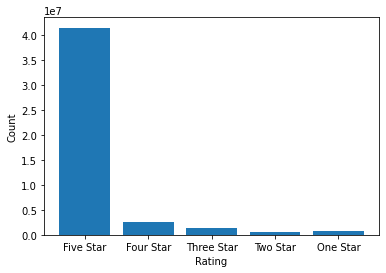

In [10]:
import matplotlib.pyplot as plt
   
Rating = ['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star']
Count = list(df[['Five Star', 'Four Star', 'Three Star', 'Two Star', 'One Star' ]].sum())

plt.bar(Rating, Count)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Looking at the distribution of the average rating of the products, we can observe that it is skewed as expected. It validates our first observation that SHoppee users are very generous in proviing ratings to their puirchased products.


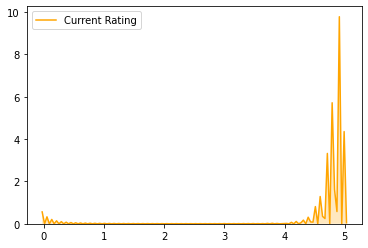

In [11]:
#Mean Rating
ax = sns.kdeplot(df['Current Rating'], shade=True, color='orange')
plt.show()

Plotting the distribution of the total ratings of each product, we can see that most of the products receive around 500 to 2000 reviews. In addition, there are very few prodjucts with more than 20,000 total reviews.

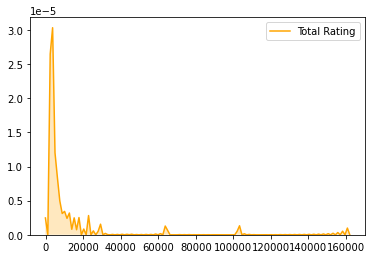

In [12]:
#Total Rating
ax = sns.kdeplot(df['Total Rating'], shade=True, color='orange')
plt.show()

Plotting the distribution of the total favorites of each product, we can see that most of the products receive around 500 to 2000 reviews. In addition, there are very few prodjucts with more than 10,000 total reviews.

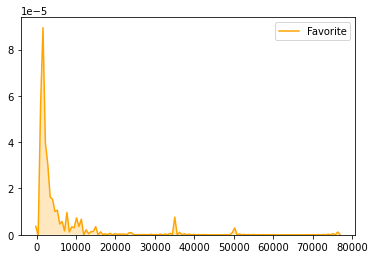

In [13]:
#Total Favorites
ax = sns.kdeplot(df['Favorite'], shade=True, color='orange')
plt.show()

In [14]:
df['Favorite'].describe()

count    41380.000000
mean      1228.248671
std       3969.437374
min          0.000000
25%         76.000000
50%        243.000000
75%        802.250000
max      76800.000000
Name: Favorite, dtype: float64

In [15]:
included = ['Preferred','Mall', 'Current Rating', 'Total Sold', 'Favorite', 'Lowest Price Guarantee']
df1 = df[included]
df1.head(5)

,Preferred,Mall,Current Rating,Total Sold,Favorite,Lowest Price Guarantee
Product ID,,,,,,
0,True,False,4.9,55500,1800.0,True
1,False,False,4.9,77700,4700.0,True
2,False,False,4.8,53000,4600.0,True
3,True,False,4.9,60100,1700.0,False
4,False,True,4.7,233800,4100.0,False


In [16]:
corr = df1.corr()
corr

,Preferred,Mall,Current Rating,Total Sold,Favorite,Lowest Price Guarantee
Preferred,1.000000,-0.162908,0.096193,-0.004541,0.004734,0.003482
Mall,-0.162908,1.000000,0.039511,-0.026445,0.000409,0.034309
Current Rating,0.096193,0.039511,1.000000,-0.034333,-0.052009,-0.018370
Total Sold,-0.004541,-0.026445,-0.034333,1.000000,0.777750,0.205343
Favorite,0.004734,0.000409,-0.052009,0.777750,1.000000,0.266570
Lowest Price Guarantee,0.003482,0.034309,-0.018370,0.205343,0.266570,1.000000


From the correlation heatmap, we can observe that most of the features are not highly correlated to each other except total sold and favorite features with a correlatio of 0.78.

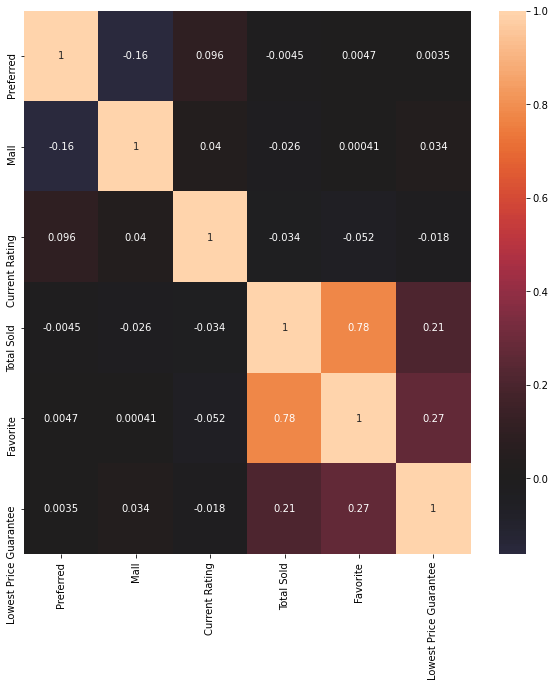

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, center=0)

# WORD CLOUDS

### General Word Cloud

From the word cloud we generated from the product names, we can see that most of the products contains the words kids, women, old, pajama and terno the most.

In [18]:
import numpy as np
import pandas as pd
from os import path 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

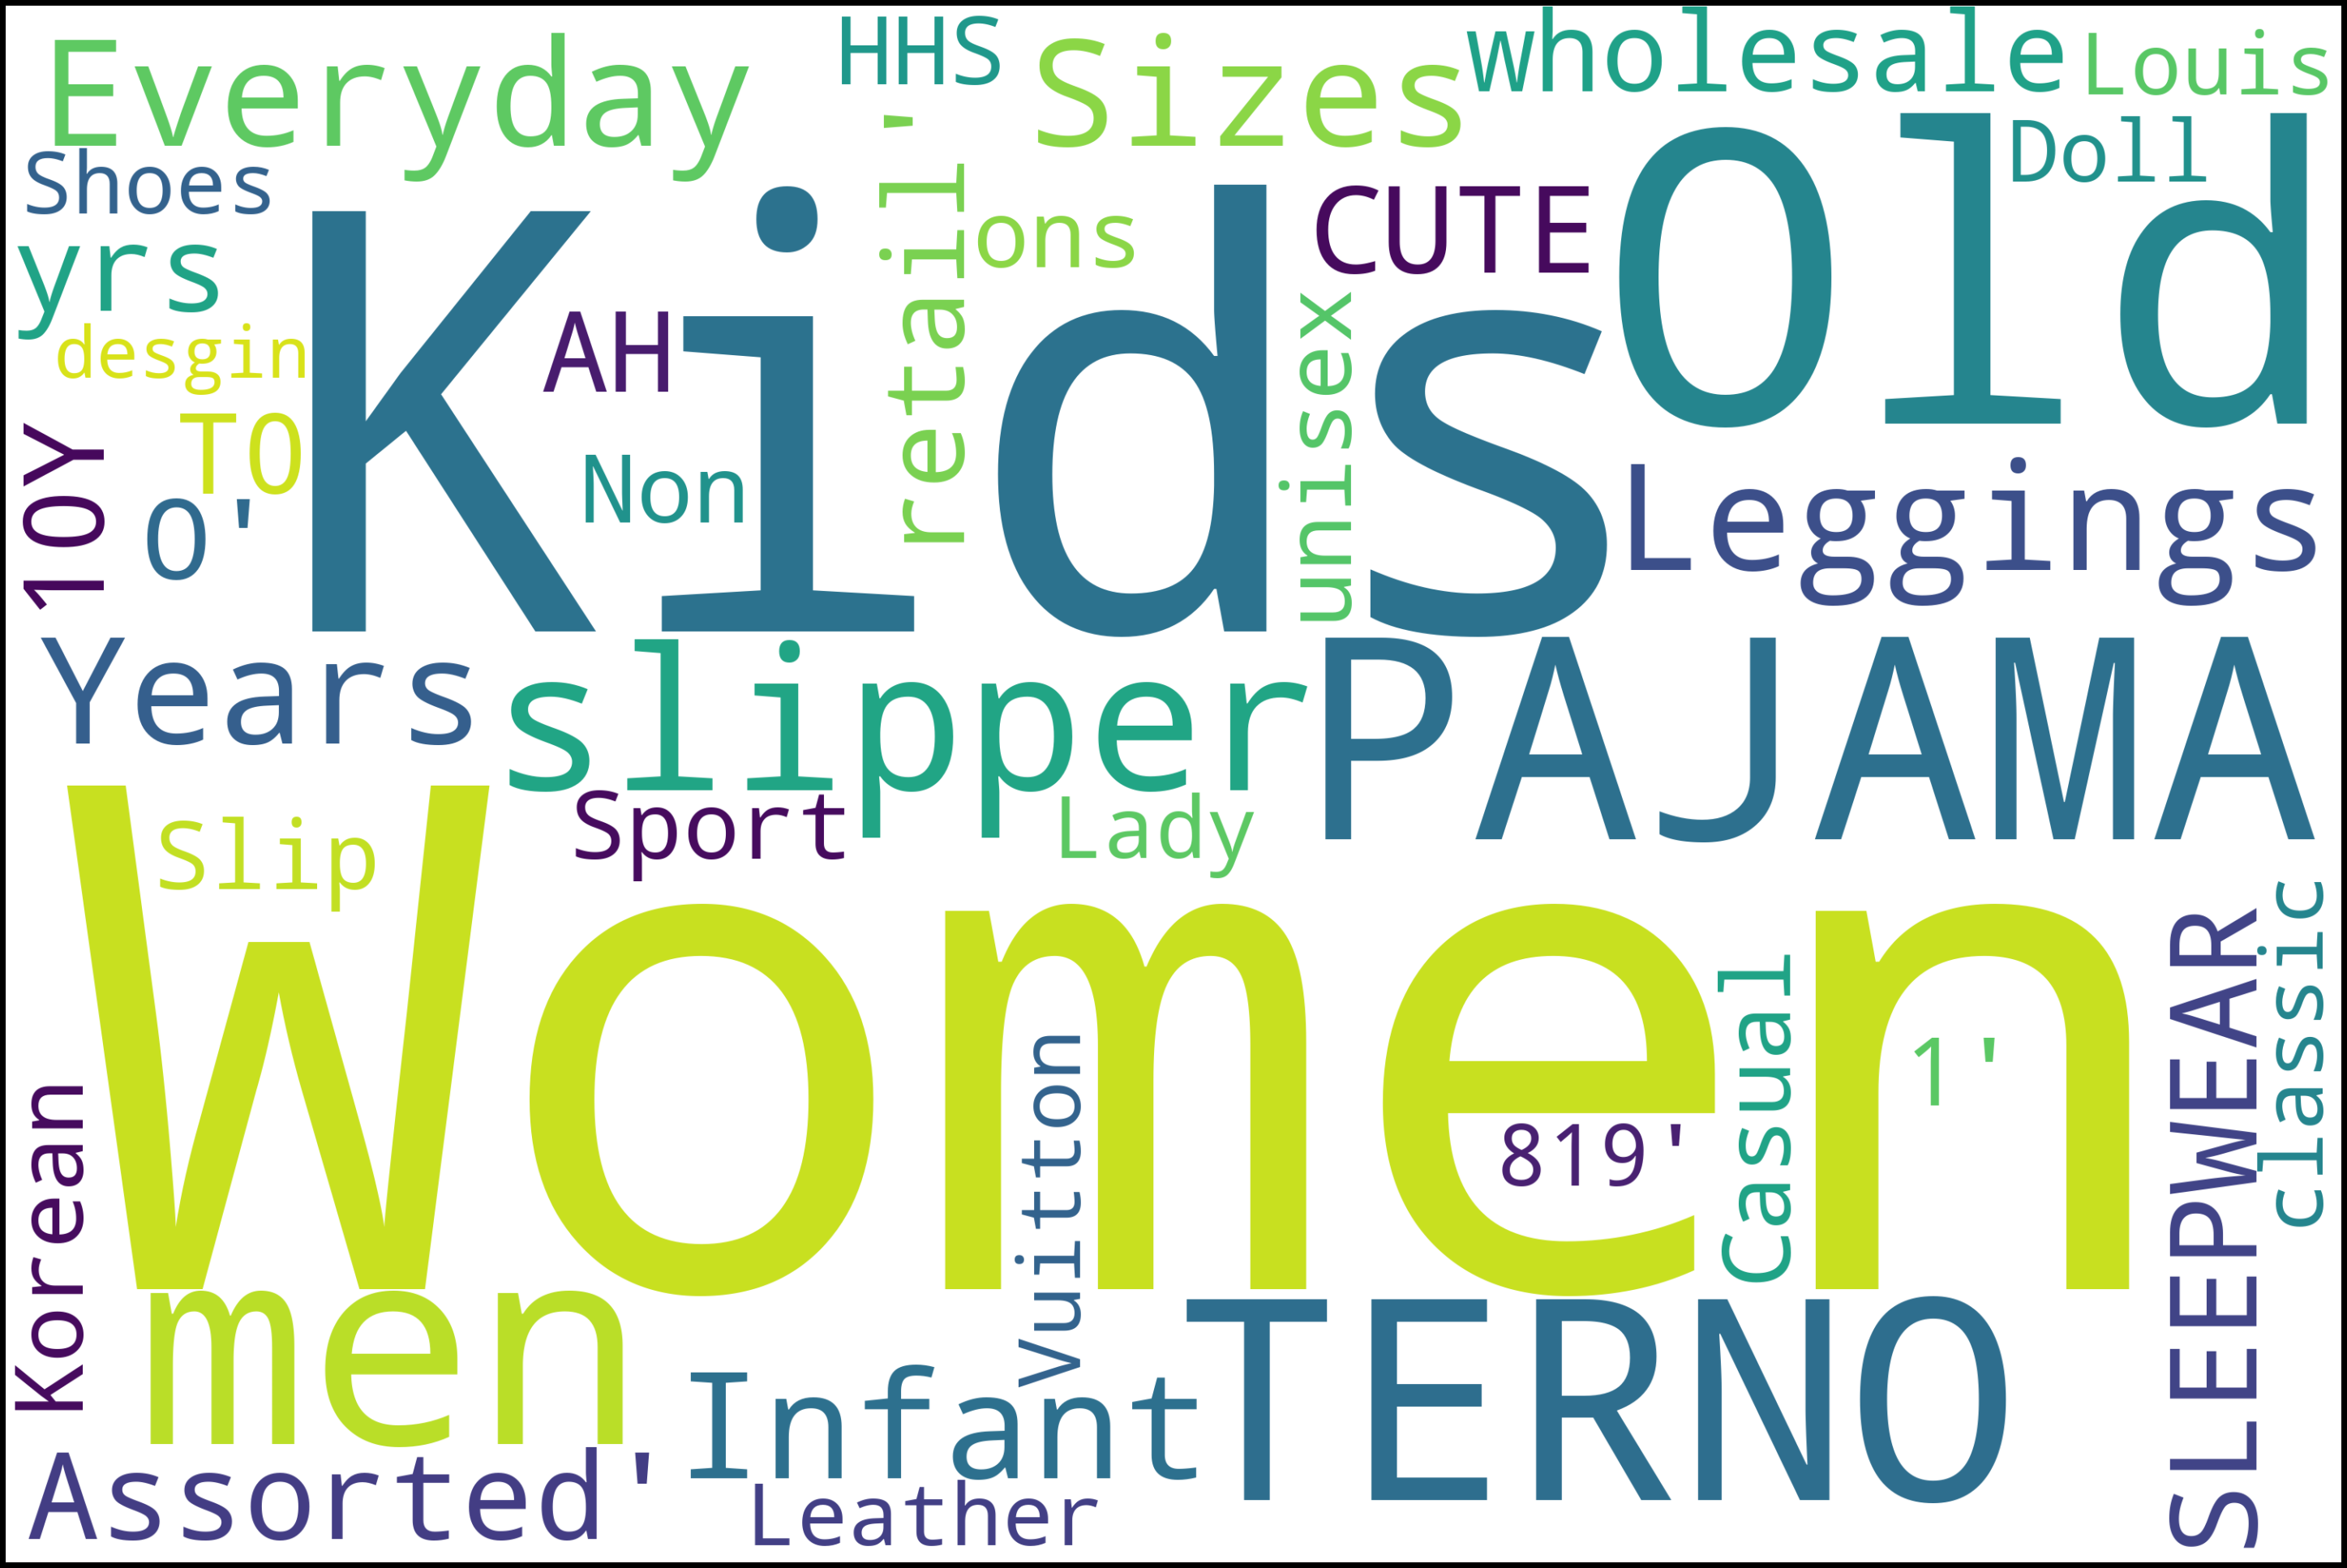

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df['Product Name'].values 
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()